<a href="https://colab.research.google.com/github/ujeongmin/ESAA/blob/main/YB_10_6_%EC%84%B8%EC%85%98_%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [3]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9121265377855887

* 정밀도

In [5]:
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.900990099009901

* 재현율

In [6]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.8584905660377359

* F1 score

In [7]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [59]:
from sklearn.preprocessing import Binarizer

import pandas as pd
import numpy as np

# 임계값 설정
custom_threshold = 0.1

pred_proba = model_lor.predict_proba(X)
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold)

# y_pred2에 넣기
y_pred2 = binarizer.transform(pred_proba_1)

In [60]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print(confusion_matrix(y, y_pred2))  # 오차행렬
print(accuracy_score(y, y_pred2))   # 정확도
print(precision_score(y, y_pred2))  # 정밀도
print(recall_score(y, y_pred2))     # 재현율
print(f1_score(y, y_pred2))         # F1 score

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


* ROC 곡선 시각화

In [61]:
from sklearn.metrics import roc_curve

# 임계값에 따른 fpr, tpr 반환 받음
fprs, tprs, thresholds = roc_curve(y, pred_proba_1)

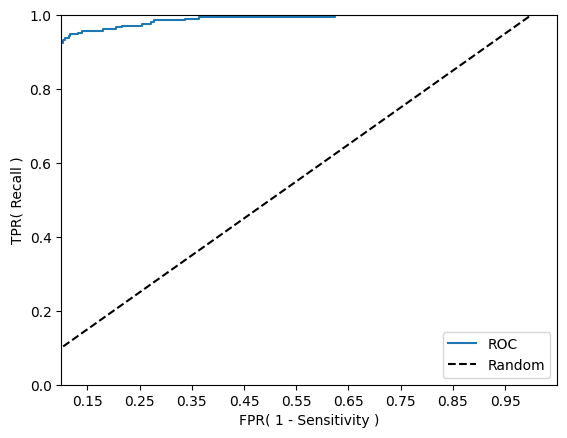

In [64]:
import matplotlib.pyplot as plt

plt.plot(fprs , tprs, label='ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# FPR X 축의 Scale 단위 변경, X, Y축 명 설정 등
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))
plt.xlim(0.1)
plt.ylim(0,1)
plt.xlabel('FPR( 1 - Sensitivity )')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.show()

* ROC AUC 값

In [66]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_pred)

0.9012340785370753